# 2020-08-04 Reports
First look at reports to analyze episode cost behavior

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
from pathlib import Path
import os

project_dir = Path(globals()['_dh'][0]+"/..").resolve()
os.chdir(project_dir)
print("Running notebook from: " + os.path.abspath(""))

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last_expr" # Default jupyter behavior
InteractiveShell.ast_node_interactivity = "last_expr" # All expressions are shown.

Running notebook from: /Users/aleph/Documents/jota/tesis/ts_mcfrl


# 1 - Load the data

In [34]:
summary_bestfit_ep0 = pd.read_csv("python/data/results/randomvalid_validation/ep_0/summary_movement_report.csv").reset_index()
details_bestfit_ep0 = pd.read_csv("/Users/aleph/Documents/jota/tesis/ts_mcfrl/python/data/results/randomvalid_validation/ep_0/movement_detail_report.csv")

# 2 - Exploration

## 2.1 Exploring total cost

,index,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost,total_cost
0,0,567,8505,0,0,0,0,8505
1,1,197,2955,0,0,0,0,2955
2,2,0,0,0,0,2012,30180,30180
3,3,1336,20040,0,0,1990,29850,49890
4,4,454,6810,0,0,1990,29850,36660


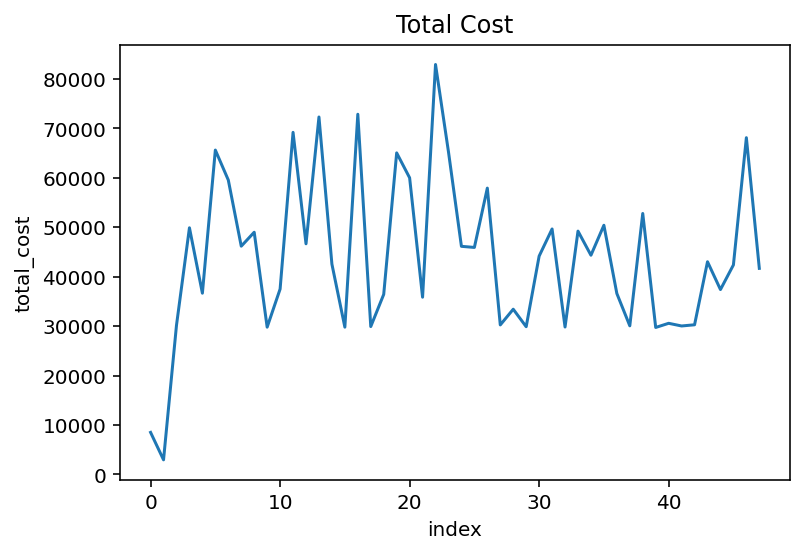

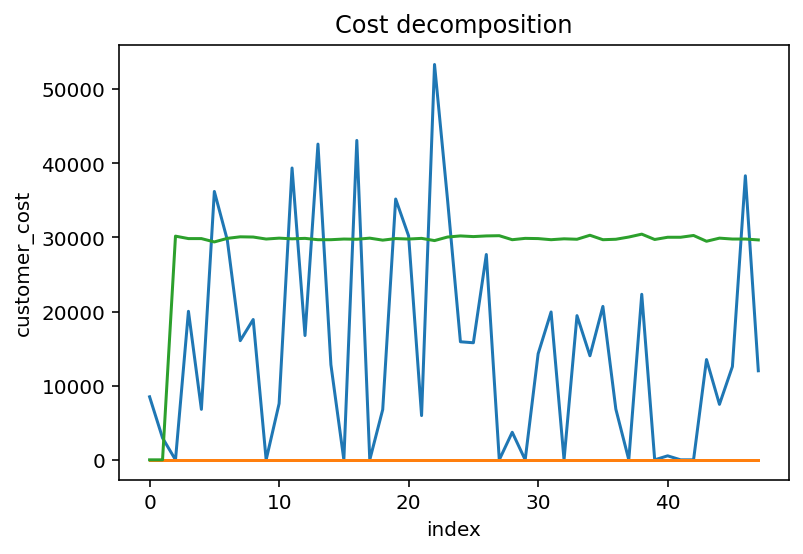

In [38]:
plt.figure();
sns.lineplot(x='index',y='total_cost',data=summary_bestfit_ep0).set_title("Total Cost");

plt.figure();
sns.lineplot(x='index',y='transportation_cost',data=summary_bestfit_ep0).set_title("Cost decomposition");
sns.lineplot(x='index',y='inventory_cost',data=summary_bestfit_ep0);
sns.lineplot(x='index',y='customer_cost',data=summary_bestfit_ep0);

summary_bestfit_ep0.head()

## 2.2 Movement Detail
As of aug 4, there's something wrong with inventory units \& inventory cost.

In [41]:
details_bestfit_ep0.head()

,source_name,destination_name,source_time,destination_time,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost
0,dcs_0,dcs_1,1,1,DC,DC,Transportation,183,2745,0,0,0,0
1,dcs_2,dcs_1,1,1,DC,DC,Transportation,123,1845,0,0,0,0
2,dcs_0,dcs_2,1,1,DC,DC,Transportation,183,2745,0,0,0,0
3,dcs_1,dcs_2,1,1,DC,DC,Transportation,78,1170,0,0,0,0
4,dcs_1,dcs_0,2,2,DC,DC,Transportation,77,1155,0,0,0,0


In [42]:
details_bestfit_ep0.query('inventory_units>0')

,source_name,destination_name,source_time,destination_time,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost


In [43]:
details_bestfit_ep0.query("source_name==destination_name")

,source_name,destination_name,source_time,destination_time,source_kind,destination_kind,movement_type,transportation_units,transportation_cost,inventory_units,inventory_cost,customer_units,customer_cost
